# Спецификация к Лабораторной работе №8 

# Обработка матрицы. Разные алгоритмы.

# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать программу обработки матрицы в соответствии с условием. 

#### Условие: 
Проанализировать квадратную матрицу. 

Сформировать одномерный массив, равный по длине количеству строк матрицы и содержащий значения 0 или 1:

- 1, если в соответствующей строке элемент на главной диагонали больше других элементов этой строки;

- 0, если это условие для данной строки не выполняется.

Найти сумму элементов матрицы.

### 2. Уточненная постановка задачи.
Дана матрица B, состоящая из n строк и n столбцов.

Получить массив $X_1, X_2, ..., X_n$ по правилу:
    
$\large{\displaystyle{X_i = \begin{cases}
1, \ B_{ii} > B_{ij}, \ \forall j: 0<j<n+1 \land j \neq i\\
0, \ B_{ii} \leq B_{ij}, \ \exists j: 0<j<n+1 \land j \neq i\\
\end{cases}, \ \forall i: 0<i<n+1 }}$

Найти $\large{\displaystyle{S = \sum_{\substack{0<i<n+1 \\ 0<j<n+1}} B_{ij} }}$

### 3. Пример с иллюстрацией.

In [1]:
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [8]:
B1 = numpy.random.randint(-100,100, size=(5,5))
numpy.savetxt('B_Lab8_1.txt', B1, fmt='%5.0f')

In [12]:
B2 = numpy.random.randint(0,2, size=(5,5))
numpy.savetxt('B_Lab8_2.txt', B2, fmt='%5.0f')
B2

array([[0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 1, 1, 1],
       [1, 0, 1, 0, 1]])

In [19]:
B3 = numpy.random.randint(-10,10, size=(3,3))
numpy.savetxt('B_Lab8_3.txt', B3, fmt='%5.0f')
B3

array([[-1, -4, -5],
       [-7,  6, -4],
       [-3,  2, -6]])

In [22]:
B4 = numpy.random.randint(-10,0, size=(4,4))
numpy.savetxt('B_Lab8_4.txt', B4, fmt='%5.0f')
B4

array([[ -7, -10,  -3,  -3],
       [ -5,  -5,  -4,  -6],
       [ -1,  -1,  -4,  -6],
       [ -3,  -6, -10,  -8]])

In [25]:
B5 = numpy.random.randint(0,10, size=(4,4))
numpy.savetxt('B_Lab8_5.txt', B5, fmt='%5.0f')
B5

array([[3, 4, 7, 2],
       [2, 3, 9, 2],
       [3, 3, 8, 1],
       [0, 1, 5, 9]])

In [23]:
print(20*' ' + 'Лаб.8\n' + 90*'=')

fin = str(input('Текстовый файл с элементами матрицы B: '))
fout = str(input('Текстовый файл с элементами матрицы B, массива X и суммой элементов S: '))

print(90*'=' + '\n' + 'Исходная матрица B: \n')
B = numpy.loadtxt(fin, dtype='int')
print(B)

X = numpy.array(len(B) * [0])
for i in range(len(B)):
    c = numpy.argmax(B[i])
    X[i] = (c == i)
print(90*'=' + '\n' + 'Сформированный массив X: \n\n' + str(X))

S = numpy.sum(B)
print('\n' + 'Сумма элементов матрицы B: \n\n' + str(S))

with open(fout, 'w') as f:
    for i in range(len(B)):
        f.write("{}\n".format(B[i]))
    f.write("{}\n".format(X))
    f.write("{}\n".format(S))

                    Лаб.8
Текстовый файл с элементами матрицы B: B_Lab8_1.txt
Текстовый файл с элементами матрицы B, массива X и суммой элементов S: BXS_Lab8_1.txt
Исходная матрица B: 

[[ 43 -68 -21 -81  90]
 [  2 -86 -79 -66 -44]
 [-38 -66 -54 -80 -32]
 [-67  46 -71  99 -61]
 [ 63  14  -7 -42 -44]]
Сформированный массив X: 

[0 0 0 1 0]

Сумма элементов матрицы B: 

-650


In [36]:
# python only
print(20*' ' + 'Лаб.8\n' + 90*'=')

fin = str(input('Текстовый файл с элементами матрицы B: '))
fout = str(input('Текстовый файл с элементами матрицы B, массива X и суммой элементов S: '))

print(90*'=' + '\n' + 'Исходная матрица B: \n')

with open(fin, 'r') as f:
    B = f.readlines()
B = [x[1:-1].split() for x in B]
B = [[int(x) for x in B[i]] for i in range(len(B))]
[print(B[i]) for i in range(len(B))]

X = [int(sum([int(B[j][i] < B[i][i]) \
for j in range(len(B[i]))]) == len(B) - 1) \
for i in range(len(B))]

print(90*'=' + '\n' + 'Сформированный массив X: \n\n' + str(X))

S = sum([sum(B[i]) for i in range(len(B))])

print('\n' + 'Сумма элементов матрицы B: \n\n' + str(S))

with open(fout, 'w') as f:
    for i in range(len(B)):
        f.write("{}\n".format(B[i]))
    f.write("{}\n".format(X))
    f.write("{}\n".format(S))

                    Лаб.8
Текстовый файл с элементами матрицы B: B_Lab8_1.txt
Текстовый файл с элементами матрицы B, массива X и суммой элементов S: BXS_Lab8_1.txt
Исходная матрица B: 

[43, -68, -21, -81, 90]
[2, -86, -79, -66, -44]
[-38, -66, -54, -80, -32]
[-67, 46, -71, 99, -61]
[63, 14, -7, -42, -44]
Сформированный массив X: 

[0, 0, 0, 1, 0]

Сумма элементов матрицы B: 

-650


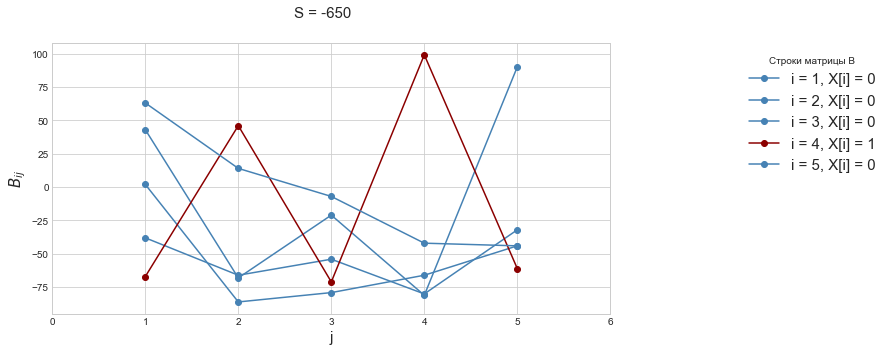

In [37]:
pylab.figure(figsize=(10,5))
col = ['steelblue', 'darkred']
for i in range(len(B)):
    pylab.plot(range(len(B[i])), B[i], '-o', c=col[X[i]], 
               label='i = ' + str(i+1) + ', X[i] = ' + str(X[i]))

pylab.suptitle('S = ' + str(S), fontsize=15)
pylab.xlabel('j', fontsize=15) 
pylab.ylabel(r'$B_{ij}$', fontsize=15)
pylab.xticks(range(-1, len(B)+1), range(len(B)+2));
pylab.legend(title='Строки матрицы B', fontsize=15, shadow=True, 
             bbox_to_anchor=(1.5,1.0));

### 4. Таблица данных 

| Класс | Имя | Описание (смысл, диапазон, точность) | Тип | Структура | Формат в/в |
| :-: | :-: | :-: | :-: | :-: | :-: |
| входные данные | fin | название текстового файла с элементами массива B | символ | строка | "+XX.txt" |
| входные данные | fout | название текстового файла с элементами массива B | символ | строка | "+XX.txt" |
| входные данные | B | вводимые из текстового файла числа исходной матрицы | цел | двумерный массив | +XX (:5) |
| выходные данные | X | выводимые в текстовый файл числа полученного массива | цел | одномерный массив | +XX (:5) |
| выходные данные | S | выводимая в текстовый файл сумма элементов матрицы | цел | простая переменная | +XX (:5) |
| промежуточные данные | i | индекс текущего элемента, 1≤i≤50 | цел | простая переменная | --- |
| промежуточные данные | j | индекс текущего элемента, 1≤j≤50 | цел | простая переменная | --- |
| промежуточные данные | MAX1 | максимальный элемент в строке не на главной диагонали | цел | простая переменная | --- |
| промежуточные данные | MAX2 | элемент в строке на главной диагонали | цел | простая переменная | --- |

_! в Delphi выход из цикла с 1 до 20 с шагом +1 происходит при значении 21, из цикла с 20 до 1 – при 0_

### 5. Входная форма
- обр 1.1 Текстовый файл с элементами матрицы B: $<fin>$       
- обр 1.2 Текстовый файл с элементами матрицы B, массива X и суммой элементов S: $<fout>$
- обр 2.1 Исходная матрица B:                 | Сформированный массив X:
- обр 2.2 $ < B[11] >  < B[12] >  …  < B[1n] > \\ ... \\ < B[n1] >  < B[n2] >  …  < B[nn] >$


### 6. Выходная форма

- обр 3 Лаб. 8
- обр 4.1 Текстовый файл с элементами матрицы B: $<fin>$       
- обр 4.2 Текстовый файл с элементами матрицы B, массива X и суммой элементов S: $<fout>$
- обр 5.1 Исходная матрица B:                 | Сформированный массив X:
- обр 5.2 $ < B[11] >  < B[12] >  …  < B[1n] >  | X[1] \\ ... \\ < B[n1] >  < B[n2] >  …  < B[nn] > | X[n]$
- обр 6.1 Сумма элементов матрицы B:
- обр 6.2 $ < S > $

### 7. Аномалии

-

### 8. Функциональные тесты

| Исходные данные | - | - | Результаты | - | Тест |
| :-: | :-: | :-: | :-: | :-: | :-: |
| fin | fout | B | X | S | № |
| B_Lab8_1.txt | BXS_Lab8_1.txt | `[[ 43 -68 -21 -81  90] [  2 -86 -79 -66 -44] [-38 -66 -54 -80 -32] [-67  46 -71  99 -61] [ 63  14  -7 -42 -44]]` | `[0 0 0 1 0]` | ` -650 ` | 1 | 
| - | - | - | - | - | - |
| B_Lab8_2.txt | BXS_Lab8_2.txt | `[[0 0 0 0 0] [1 0 1 1 0] [0 0 1 0 0] [1 0 1 1 1] [1 0 1 0 1]]` | `[1 0 1 0 0]` | `11` | 2 |
| - | - | - | - | - | - |
| B_Lab8_3.txt | BXS_Lab8_3.txt | `[[-1 -4 -5] [-7  6 -4] [-3  2 -6]]` | `[1 1 0]` | `-22` | 3 |
| - | - | - | - | - | - |
| B_Lab8_4.txt | BXS_Lab8_4.txt | `[[-7 -10 -3 -3] [-5 -5 -4 -6] [-1 -1 -4 -6] [-3 -6 -10 -8]]` | `[0 0 0 0]` | `-82` | 4 |
| - | - | - | - | - | - |
| B_Lab8_5.txt | BXS_Lab8_5.txt | `[[3 4 7 2] [2 3 9 2] [3 3 8 1] [0 1 5 9]]` | `[0 0 1 1]` | `62` | 5 |

| № теста | Входные  данные | - | - | Ожидаемый результат | - | Смысл теста |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| - | - | - | - | - | - | - |
| 1 | fin = 'B_Lab8_1.txt' | fout = 'BXS_Lab8_1.txt' |  B = `[[ 43 -68 -21 -81  90] [  2 -86 -79 -66 -44] [-38 -66 -54 -80 -32] [-67  46 -71  99 -61] [ 63  14  -7 -42 -44]]` | X = `[0 0 0 1 0]` | S = `-650` | Подтвердить правильность расчетов в случае матрицы 5х5 |
| - | - | - | - | - | - | - |
| 2 | fin = 'B_Lab8_2.txt' | fout = 'BXS_Lab8_2.txt' |  B = `[[0 0 0 0 0] [1 0 1 1 0] [0 0 1 0 0] [1 0 1 1 1] [1 0 1 0 1]]` | X = `[1 0 1 0 0]` | S = `11` | Протестировать простейший случай с бинарными значениями |
| - | - | - | - | - | - | - |
| 3 | fin = 'B_Lab8_3.txt' | fout = 'BXS_Lab8_3.txt' |  B = `[[-1 -4 -5] [-7  6 -4] [-3  2 -6]]` | X = `[1 1 0]` | S = `-22` | Протестировать случай квадратной матрицы 3х3 |
| - | - | - | - | - | - | - |
| 4 | fin = 'B_Lab8_4.txt' | fout = 'BXS_Lab8_4.txt' |  B = `[[-7 -10 -3 -3] [-5 -5 -4 -6] [-1 -1 -4 -6] [-3 -6 -10 -8]]` | X = `[0 0 0 0]` | S = `-82` | Подтвердить правильность расчетов в случае отрицательных чисел |
| - | - | - | - | - | - | - |
| 5 | fin = 'B_Lab8_5.txt' | fout = 'BXS_Lab8_5.txt' |  B = `[[3 4 7 2] [2 3 9 2] [3 3 8 1] [0 1 5 9]]` | X = `[0 0 1 1]` | S = `62` | Протестировать матрицу, состоящую из неотрицательных чисел |

| - | Результаты | № теста |
| :-: | :-: | :-: |
| - | - | - |
| X | Максимальная вычислительная нагрузка = 25 (сравнение элементов) + 25 (суммирование) | 1 |
| S | Соответствует ожидаемым числовым значениям | 1 |
| X | Максимальная вычислительная нагрузка = 25 (сравнение элементов) + 25 (суммирование) | 2 |
| S | Корректный результат в случае бинарных значений переменных | 2 |
| X | Максимальная вычислительная нагрузка = 9 (сравнение элементов) + 9 (суммирование) | 3 |
| S | Соответствует ожидаемым числовым значениям и легко подтверждается визуально | 3 |
| X | Максимальная вычислительная нагрузка = 16 (сравнение элементов) + 16 (суммирование) | 4 |
| S | Корректный результат в случае отрицательных чисел | 4 |
| X | Максимальная вычислительная нагрузка = 16 (сравнение элементов) + 16 (суммирование)| 5 |
| S | Соответствует ожидаемым числовым значениям | 5 |


### 9. Метод
Отделим ввод-вывод от обработки данных и разделим задачу на три подзадачи:

1.	_Подзадача А 0.1._ Запросить названия текстовых файлов ввода-вывода, считать из текстового файла ввода исходные данные (обр.1-2), затем вывести их на экран (обр.3-5) для визуального подтверждения.
2.	_Подзадача А 0.2._ Решение поставленной задачи: 

Сформировать одномерный массив, равный по длине количеству строк исходной матрицы `B` и содержащий значения 0 или 1:

- 1, если в соответствующей строке элемент на главной диагонали больше других элементов этой строки;

- 0, если это условие для данной строки не выполняется.

Найти сумму элементов матрицы.
    
3.	_Подзадача А 0.3._ Ввести полученные результаты (`X`, `S`) на экран (обр.5-6) и записать в файл вывода исходный массив и полученный результат.

Ввод-вывод тривиален и представляет собой чисто техническую задачу. 

Для осуществления процесса ввода-вывода и обработки массива потребуются промежуточные переменные: 

- `i` – индекс текущего элемента массива, 

- `j` – индекс текущего элемента массива,

- `MAX1` - максимальный элемент в строке не на главной диагонали,

- `MAX2` - элемент в строке на главной диагонали.

Их следует добавить в таблицу данных. 

Алгоритм необходим только для обработка входных данных и расчета результата.

### 10. Алгоритм

[Sample diagrams](http://blockdiag.com/en/blockdiag/examples.html#sample-diagrams)

In [1]:
%%file block_diagram

blockdiag {
    orientation = portrait;
    class start_end [shape = ellipse, fontsize = 15, color = lightskyblue];
    class input_out [shape = flowchart.input, fontsize = 15, width = 600, color = lightcyan];
    class main_box [shape = box, width = 410, height = 150, fontsize = 18];
    
    Начало -> 
    "Вывод заголовка по обр.3 на экран" -> 
    "Ввод имени файла по обр.1.1" -> "Ввод имени файла по обр.1.2" ->
    "Вывод пояснения по обр.2.1" -> "Ввод B из файла по обр.2.2" ->
    "Вывод имени файла по обр.4.1 на экран" -> "Вывод имени файла по обр.4.2 на экран" ->
    "Вывод пояснения по обр.5.1,6.1 на экран" -> 
    "Формирование массива X и подсчет суммы элементов S" ->
    "Вывод B, X, S на экран и в файл по обр.5.2,6.2" ->
    Конец;

    Начало, Конец [class = "start_end"];
    "Ввод имени файла по обр.1.1", "Ввод имени файла по обр.1.2" [class = "input_out"];
    "Вывод пояснения по обр.2.1", "Ввод B из файла по обр.2.2" [class = "input_out"];
    "Вывод имени файла по обр.4.1 на экран", "Вывод имени файла по обр.4.2 на экран" [class = "input_out"];
    "Вывод пояснения по обр.5.1,6.1 на экран" [class = "input_out"];
    "Вывод B, X, S на экран и в файл по обр.5.2,6.2" [class = "input_out"]; 
    "Вывод заголовка по обр.3 на экран" [class = "input_out"];
    "Формирование массива X и подсчет суммы элементов S" [class = "main_box"];
    
    "Вывод пояснения по обр.5.1,6.1 на экран" -> 
    "Формирование массива X и подсчет суммы элементов S" [label = 'Вх. B', fontsize = 18];
    "Формирование массива X и подсчет суммы элементов S" ->
    "Вывод B, X, S на экран и в файл по обр.5.2,6.2" [label = 'Вых. X, S', fontsize = 18];
}

Overwriting block_diagram


In [2]:
!blockdiag block_diagram

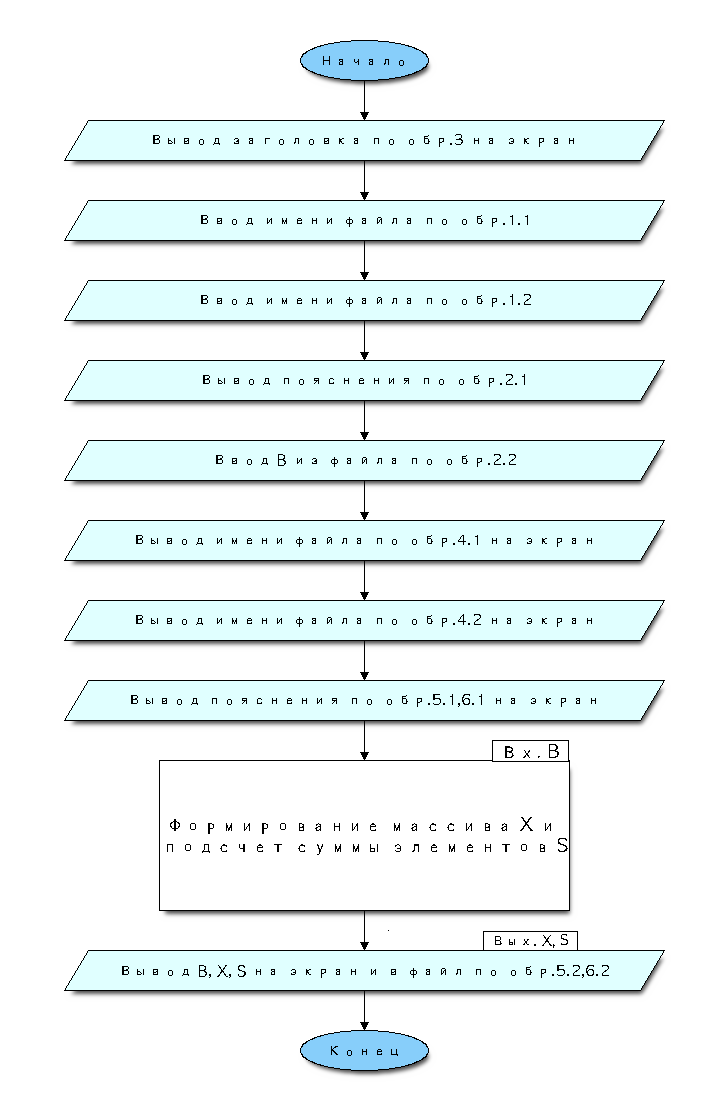

In [3]:
from IPython.display import Image
Image("block_diagram.png")

### 11. Программа на <i>Delphi</i>. 

__Диалоговый вариант {ввод названий файлов и данных из текстового файла, вывод на экран и в текстовый файл}__

Синтаксис:

[Pascal Tutorial](https://www.tutorialspoint.com/pascal/index.htm)

In [ ]:
program Lab8; //сохранить как lab8.dpr (DPR – Delphi PRoject)  
{$APPTYPE CONSOLE}
Uses Windows; // для русификации 

    const
        {заглушка для теста 1}    
        S1 = -650;
        {заглушка для теста 2}    
        S2 = 11; 
        {заглушка для теста 3}    
        S3 = -22; 
        {заглушка для теста 4}    
        S4 = -82;   
        {заглушка для теста 5}    
        S5 = 62;
        X1: array[1..5] of integer = (0, 0, 0, 1, 0);
        {заглушка для теста 2}    
        X2: array[1..5] of integer = (1, 0, 1, 0, 0); 
        {заглушка для теста 3}    
        X3: array[1..3] of integer = (1, 1, 0); 
        {заглушка для теста 4}    
        X4: array[1..4] of integer = (0, 0, 0, 0);   
        {заглушка для теста 5}    
        X5: array[1..4] of integer = (0, 0, 1, 1);

    var
        i, j: integer;
        S: integer;
        fin, fout, method: string;
        tfin, tfout: TextFile;
        B: array [0..1000, 0..1000] of integer;    
        X: array [0..1000] of integer; 
            
    begin
        setConsoleCP(1251); // для ввода  русификация и 
        setConsoleOutputCP(1251); // для вывода 

        {A0.1, A0.3 - ввод-вывод входных данных}
        writeln('Лаб.8' :40); {вывод заголовка c переходом на следующую строку по обр.3}
        
        {ввод-вывод строковой переменной - имени файла с входными данными по обр.1.1, 4.1}
        writeln('Текстовый файл с элементами матрицы B:  '); 
        readln(fin);
        writeln(fin);

        {ввод-вывод строковой переменной - имени файла с выходными данными по обр.1.2, 4.2}
        writeln('Текстовый файл с элементами матрицы B, массива X и суммой элементов S: '); 
        readln(fout); 
        writeln(fout);
        
        {ввод-вывод исходной матрицы B по обр.2.1, 2.2, 5.1, 5.2}
        writeln('Исходная матрица B: '); {вывод пояснения с переходом на следующую строку}
        
        AssignFile(tfin, fin); reset(tfin); {открыть файл для чтения} 
        AssignFile(tfout, fout); rewrite(tfout); {открыть файл для записи}
            
        i :=1;
        while not eoln do
        begin
            j := 1;
            while not eoln do
            begin
                read(B[i,j]);
                write(B[i,j], ' '); {вывод элемента на экран}
                write(tfout, B[i,j]:5, ' '); {вывод элемента в файл}
                
                j := j + 1;
            end;
            
            readln; writeln; writeln(tfout);
            
            i := i + 1;
        end;
        
        CloseFile(tfin); {закрыть файл для чтения} 
           
        for i:=1 to 80 do 
            write('='); {отделим визуально чертой и строкой введенные и выводимые значения}
        writeln; 
        
        {вывод массива X и суммы S по обр.5.1, 5.2, 6.1, 6.2}
        
        writeln('Сформированный массив X: '); {вывод пояснения с переходом на следующую строку}
        
        for i:=1 to N do
        begin 
            writeln(X1[i]:1); {вывод элемента и переход на следующую строку на экране}
            writeln(tfout, X1[i]:1); {вывод элемента и переход на следующую строку в файле}
        end;
        
        writeln('Сумма элементов матрицы B: '); {вывод пояснения с переходом на следующую строку}
        writeln(S1:5); {вывод значения переменной и переход на следующую строку на экране}
        writeln(tfout, S1:5); {вывод значения переменной и переход на следующую строку в файле}
        
        CloseFile(tfout); {закрыть файл для записи}
        
    end.

#### Вариант программы для онлайн-компилятора.
[Compile and Execute Pascal Online](http://www.compileonline.com/compile_pascal_online.php)

In [ ]:
// main.pas
program Lab8; // сохранить как lab8.dpr (DPR – Delphi PRoject)  
    const
        {заглушка для теста 1}    
        S1 = -650;
        X1: array [1..5] of integer = (0, 0, 0, 1, 0);

    var
        i, j: integer;
        B: array [1..1000,1..1000] of integer; 
            
    begin

        {A0.1, A0.3 - ввод-вывод входных данных}
        writeln('Лаб.8' :40); {вывод заголовка c переходом на следующую строку по обр.3}
        
        {ввод-вывод исходной матрицы B по обр.2.1, 2.2, 5.1, 5.2}
        writeln('Исходная матрица B: '); {вывод пояснения с переходом на следующую строку}
        
        i :=1;
        while not eoln do
        begin
            j := 1;
            while not eoln do
            begin
                read(B[i,j]);
                write(B[i,j], ' ');
                j := j + 1;
            end;
            readln; writeln;
            i := i + 1;
        end;
    
        
        for i:=1 to 80 do 
            write('='); {отделим визуально чертой и строкой введенные и выводимые значения}
        writeln; 
        
        {вывод массива X и суммы S по обр.5.1, 5.2, 6.1, 6.2}

        
        writeln('Сформированный массив X: '); {вывод пояснения с переходом на следующую строку}
        
        for i:=1 to Length(X1) do
        begin 
            writeln(X1[i]:1); {вывод элемента и переход на следующую строку на экране}
        end;
        
        writeln('Сумма элементов матрицы B: '); {вывод пояснения с переходом на следующую строку}
        writeln(S1:5); {вывод значения переменной и переход на следующую строку на экране}

    end.

In [ ]:
// STDIN
43 -68 -21 -81 90
2 -86 -79 -66 -44
-38 -66 -54 -80 -32
-67 46 -71 99 -61
63 14 -7 -42 -44

## Раскрытие абстракции А0.2
_Поскольку условие всей задачи совпадает (за исключением необходимости ввода-вывода) с условием выделенной подзадачи,_

_вместо полной спецификации с пунктами 1-11 выполнено просто дополнение к пунктам 9-11._

### 9. Метод
Пусть

- $i$ – номер текущей строки,

- $j$ – номер текущего столбца,

- $B[i][j]$ – соответствующий элемент исходной матрицы B,

- $X[i]$ - соответствующий строке исходной матрицы элемент массива X,

- $S$ - сумма элементов исходной матрицы.
  
В циклах по каждой $i$-ой строке по каждому $j$-му столбцу выполняются следующие действия:

- проверяется выполнение условия: $B_{ii} > B_{ij}, \ \forall j: 0<j<n+1 \land j \neq i$;

- формируется массив $X$, состоящий из 1 и 0 в зависимости от выполнения данного условия;

- суммируются элементы исходной матрицы, а значит обновляется значение переменной $S$. 



### 10. Алгоритм

#### Вариант 1

Ввод элементов матрицы в одном цикле, анализ и формирование новых переменных - в другом.

In [59]:
%%file block_diagram2

blockdiag {
    orientation = portrait;
    
    class yes [thick, label = "Да", color = blue, textcolor = blue];
    class no [label = "Нет", color = red, textcolor = red];
    class start_end [shape = ellipse, fontsize = 18, color = lightskyblue];
    class input_out [shape = flowchart.input, fontsize = 18, 
                     width = 400, color = lightcyan];
    class loop_in [shape = flowchart.loopin, fontsize = 18, 
                   width = 300, color = lightsteelblue];
    class loop_out [shape = flowchart.loopout, fontsize = 18, 
                    width = 300, color = lightsteelblue];
    class condition [shape = flowchart.condition, fontsize = 18, 
                     width = 400, height = 100, color = lightsteelblue];
    class command_box [shape = roundedbox, fontsize = 18, width = 300];
    
    Начало -> "S := 0" -> "i := 1; +1; n" -> "X[i] := 1" ->
    "j := 1; +1; n" -> "S := S + B[i][j]" -> 
    "i≠j ∧ B[i][i] <= B[i][j]" -> "X[i] := 0" ->
    "j = n" -> "i = n" -> Конец; 
    "i≠j ∧ B[i][i] <= B[i][j]" -> "j = n";
    
    Начало, Конец [class = "start_end"];
    "i := 1; +1; n" [class = "loop_in"];
    "j := 1; +1; n" [class = "loop_in"];
    "i = n" [class = "loop_out"];
    "j = n" [class = "loop_out"];
    "i≠j ∧ B[i][i] <= B[i][j]"[class = "condition"];
    "S := S + B[i][j]", "S := 0" [class = "command_box"];
    "X[i] := 1", "X[i] := 0" [class = "command_box"];
    
    "i≠j ∧ B[i][i] <= B[i][j]" -> "X[i] := 0" [class = 'yes']; 
    "i≠j ∧ B[i][i] <= B[i][j]" -> "j = n" [class = 'no'];
}

Overwriting block_diagram2


In [60]:
!blockdiag block_diagram2

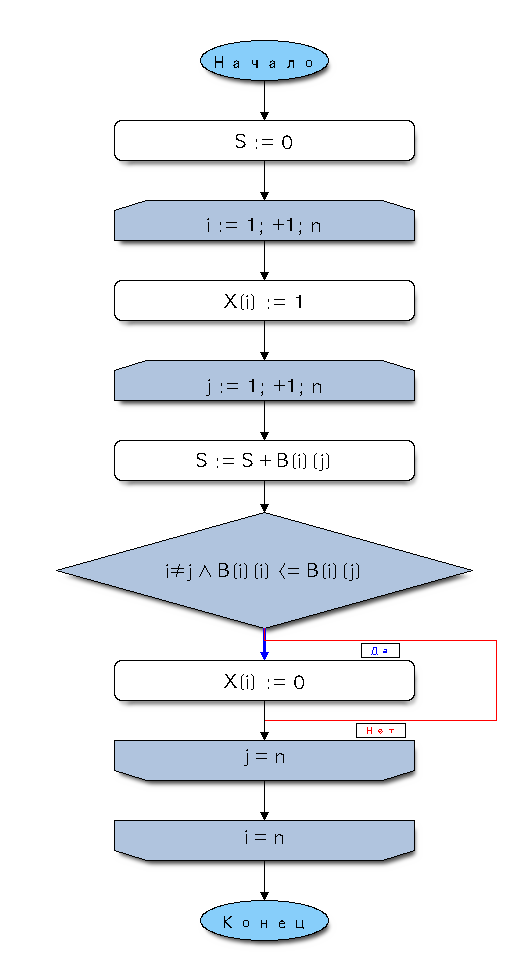

In [61]:
Image("block_diagram2.png")

#### Вариант 2

Ввод элементов матрицы, анализ и формирование новых переменных - в одном цикле.

In [50]:
%%file block_diagram2

blockdiag {
    orientation = portrait;
    
    class yes [thick, label = "Да", color = blue, textcolor = blue];
    class no [thick, label = "Нет", color = red, textcolor = red];
    class start_end [shape = ellipse, fontsize = 18, color = lightskyblue];
    class input_out [shape = flowchart.input, fontsize = 18, 
                     width = 400, color = lightcyan];
    class loop_in [shape = flowchart.loopin, fontsize = 18, 
                   width = 200, color = lightsteelblue];
    class loop_out [shape = flowchart.loopout, fontsize = 18, 
                    width = 200, color = lightsteelblue];
    class condition [shape = flowchart.condition, fontsize = 18, 
                     width = 250, height = 100, color = lightsteelblue];
    class command_box [shape = roundedbox, fontsize = 18, width = 300];
    
    Начало -> "S := 0" -> "i := 1; +1; n" -> "X[i] := 0; MAX1 := -1000" ->
    "j := 1; +1; n" -> "S := S + B[i][j]" ->
    "i = j" -> "MAX2 := B[i,j]" -> "j = n" -> 
    "MAX2 > MAX1" -> "X[i] := 1" -> "i = n" -> Конец; 
    "i = j" -> "B[i,j] > MAX1" -> "MAX1 := B[i,j]" -> 
    "j = n" -> "MAX2 > MAX1" -> "i = n"; 
    "B[i,j] > MAX1" -> "j = n";
    
    Начало, Конец [class = "start_end"];
    "i := 1; +1; n" [class = "loop_in"];
    "j := 1; +1; n" [class = "loop_in"];
    "i = n" [class = "loop_out"];
    "j = n" [class = "loop_out"];
    "i = j", "B[i,j] > MAX1", "MAX2 > MAX1" [class = "condition"];
    "S := S + B[i][j]", "S := 0" [class = "command_box"];
    "MAX1 := B[i,j]", "MAX2 := B[i,j]" [class = "command_box"];
    "X[i] := 1", "X[i] := 0; MAX1 := -1000" [class = "command_box"];
    
    "i = j" -> "MAX2 := B[i,j]"  [class = 'yes'];
    "i = j" -> "B[i,j] > MAX1" [class = 'no'];
    "B[i,j] > MAX1" -> "MAX1 := B[i,j]" [class = 'yes']; 
    "B[i,j] > MAX1" -> "j = n" [class = 'no'];
    "MAX2 > MAX1" -> "X[i] := 1"  [class = 'yes'];
    "MAX2 > MAX1" -> "i = n" [class = 'no'];
}

Overwriting block_diagram2


In [51]:
!blockdiag block_diagram2

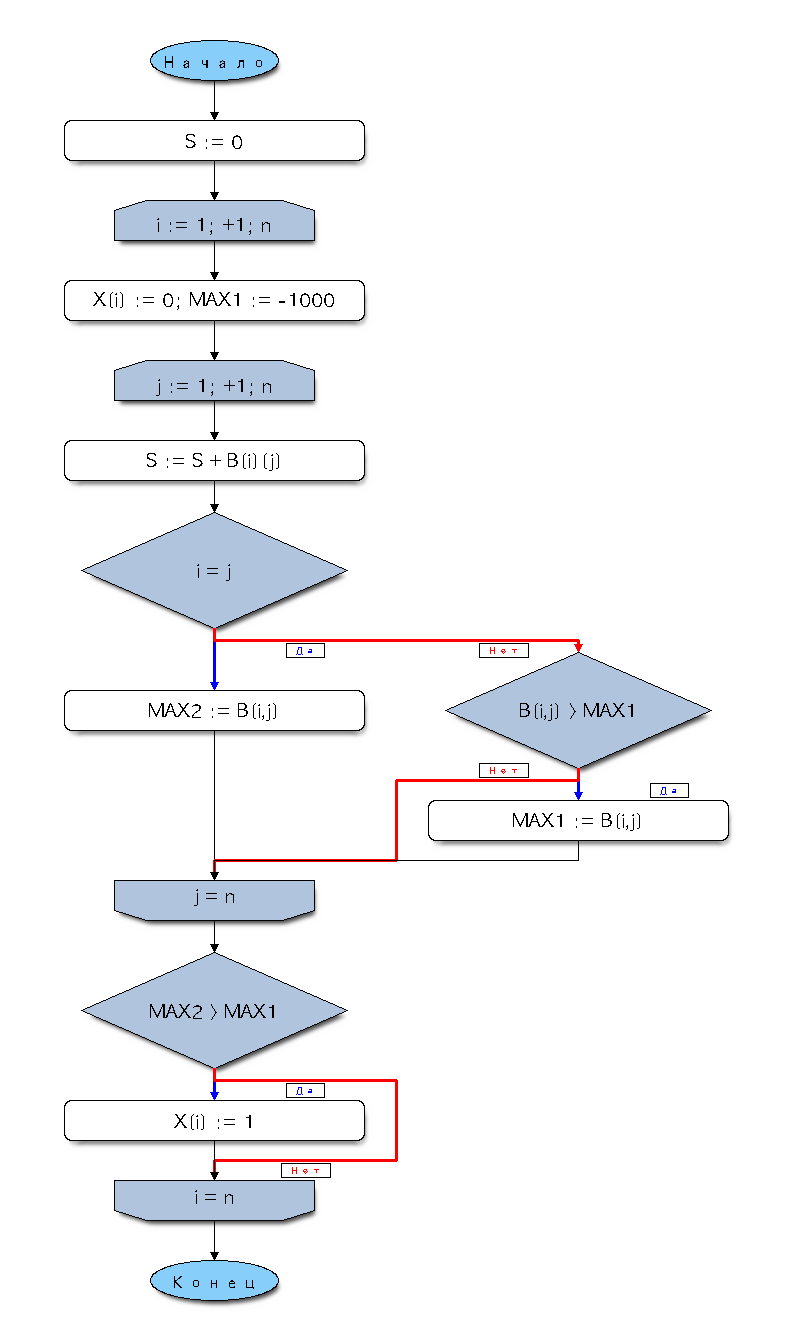

In [52]:
Image("block_diagram2.png")

### 11. Программа на <i>Delphi</i>.
#### Программный код раскрытия абстракции.

In [ ]:
i := 1; S := 0;
            
while not eof(tfin) do
begin
    j := 1; X[i] := 0; MAX1 := -1000;
                        
    while not eof(tfin) do
    begin
        read(B[i,j]);
        write(B[i,j]:5, ' ');
        write(tfout, B[i,j]:5, ' ');
                
        if i = j then 
            MAX2 := B[i,j]
            
        else 
            if B[i,j] > MAX1 then MAX1 := B[i,j];
            
        S := S + B[i,j];
        j := j + 1;
    end;
        
    if MAX2 > MAX1 then X[i] := 1;
            
    write('    | ', X[i]:1); {вывод значения переменной и переход на следующую строку на экране}
    write(tfout, X[i]:1, ' '); {вывод значения переменной и переход на следующую строку в файле}
    readln; writeln; writeln(tfout);
        
    i := i + 1;
end;

#### Вариант программы для чтения и записи текстовых файлов.

In [ ]:
program Lab8; //сохранить как lab8.dpr (DPR – Delphi PRoject)  
{$APPTYPE CONSOLE}
Uses Windows; // для русификации 

    var
        i, j: integer;
        S, MAX1, MAX2: integer;
        fin, fout: string;
        tfin, tfout: TextFile;
        B: array [0..1000, 0..1000] of integer;    
        X: array [0..1000] of integer; 
            
    begin
        setConsoleCP(1251); // для ввода  русификация и 
        setConsoleOutputCP(1251); // для вывода 

        {A0.1, A0.3 - ввод-вывод входных данных}
        writeln('Лаб.8' :40); {вывод заголовка c переходом на следующую строку по обр.3}
        writeln;
        
        {ввод-вывод строковой переменной - имени файла с входными данными по обр.1.1, 4.1}
        writeln('Текстовый файл с элементами матрицы B:  '); 
        readln(fin);
        writeln(fin);

        {ввод-вывод строковой переменной - имени файла с выходными данными по обр.1.2, 4.2}
        writeln('Текстовый файл с элементами матрицы B, массива X и суммой элементов S: '); 
        readln(fout); 
        writeln(fout);
        
        AssignFile(tfin, fin); reset(tfin); {открыть файл для чтения} 
        AssignFile(tfout, fout); rewrite(tfout); {открыть файл для записи}
            
        writeln;
        {ввод-вывод исходной матрицы B и массива X по обр.2.1, 2.2, 5.1, 5.2}    
        writeln('Исходная матрица B:                 | Сформированный массив X: '); 
        {вывод пояснения с переходом на следующую строку}
            
        i := 1; S := 0;
            
        while not eof(tfin) do
        begin
            j := 1; X[i] := 0; MAX1 := -1000;
                        
            while not eof(tfin) do
            begin
                read(B[i,j]);
                write(B[i,j]:5, ' ');
                write(tfout, B[i,j]:5, ' ');
                
                if i = j then 
                    MAX2 := B[i,j]
            
                else 
                    if B[i,j] > MAX1 then MAX1 := B[i,j];
            
                S := S + B[i,j];
                j := j + 1;
            end;
        
            if MAX2 > MAX1 then X[i] := 1;
            
            write('    | ', X[i]:1); {вывод значения переменной и переход на следующую строку на экране}
            write(tfout, X[i]:1, ' '); {вывод значения переменной и переход на следующую строку в файле}
            readln; writeln; writeln(tfout);
        
            i := i + 1;
        end;

        writeln; writeln(tfout);
        
        CloseFile(tfin); {закрыть файл для чтения} 
           
        {вывод суммы S по обр.6.1, 6.2}        
        writeln('Сумма элементов матрицы B: '); {вывод пояснения с переходом на следующую строку}
        writeln(S:5); {вывод значения переменной и переход на следующую строку на экране}
        writeln(tfout, S:5); {вывод значения переменной и переход на следующую строку в файле}
        
        CloseFile(tfout); {закрыть файл для записи}
        
    end.

#### Вариант программы с именами файлов, заданными в качестве параметров.

In [ ]:
program Lab8; //сохранить как lab8.dpr (DPR – Delphi PRoject)  
{$APPTYPE CONSOLE}
Uses Windows; // для русификации 

    var
        i, j: integer;
        S, MAX1, MAX2: integer;
        tfin, tfout: TextFile;
        B: array [0..1000, 0..1000] of integer;    
        X: array [0..1000] of integer; 
            
    begin
        setConsoleCP(1251); // для ввода  русификация и 
        setConsoleOutputCP(1251); // для вывода 

        {A0.1, A0.3 - ввод-вывод входных данных}
        writeln('Лаб.8' :40); {вывод заголовка c переходом на следующую строку по обр.3}
        writeln;
        
        if (ParamCount<2) then 
        begin 
        writeln('CritError: Не заданы параметры программы’);
        readln: exit;
        end;
        
        AssignFile(tfin, ParamStr(1)); reset(tfin); {открыть файл для чтения} 
        AssignFile(tfout, ParamStr(2)); rewrite(tfout); {открыть файл для записи}
            
        writeln;
        {ввод-вывод исходной матрицы B и массива X по обр.2.1, 2.2, 5.1, 5.2}    
        writeln('Исходная матрица B:                 | Сформированный массив X: '); 
        {вывод пояснения с переходом на следующую строку}
            
        i := 1; S := 0;
            
        while not eof(tfin) do
        begin
            j := 1; X[i] := 0; MAX1 := -1000;
                        
            while not eof(tfin) do
            begin
                read(B[i,j]);
                write(B[i,j]:5, ' ');
                write(tfout, B[i,j]:5, ' ');
                
                if i = j then 
                    MAX2 := B[i,j]
            
                else 
                    if B[i,j] > MAX1 then MAX1 := B[i,j];
            
                S := S + B[i,j];
                j := j + 1;
            end;
        
            if MAX2 > MAX1 then X[i] := 1;
            
            write('    | ', X[i]:1); {вывод значения переменной и переход на следующую строку на экране}
            write(tfout, X[i]:1, ' '); {вывод значения переменной и переход на следующую строку в файле}
            readln; writeln; writeln(tfout);
        
            i := i + 1;
        end;

        writeln; writeln(tfout);
        
        CloseFile(tfin); {закрыть файл для чтения} 
           
        {вывод суммы S по обр.6.1, 6.2}        
        writeln('Сумма элементов матрицы B: '); {вывод пояснения с переходом на следующую строку}
        writeln(S:5); {вывод значения переменной и переход на следующую строку на экране}
        writeln(tfout, S:5); {вывод значения переменной и переход на следующую строку в файле}
        
        CloseFile(tfout); {закрыть файл для записи}
        
    end.

#### Вариант программы для онлайн-компилятора.
[Compile and Execute Pascal Online](http://www.compileonline.com/compile_pascal_online.php)

In [ ]:
Program Lab8;

var
    i, j: integer;
    S, MAX1, MAX2: integer;
    B: array [0..1000, 0..1000] of integer;    
    X: array [0..1000] of integer; 
        
begin

    {A0.1, A0.3 - ввод-вывод входных данных}
    writeln('Лаб.8' :40); {вывод заголовка c переходом на следующую строку по обр.3}
    
    writeln;
    {ввод-вывод исходной матрицы B по обр.2.1, 2.2, 5.1, 5.2}    
    writeln('Исходная матрица B:                 | Сформированный массив X: '); 
    {вывод пояснения с переходом на следующую строку}
            
    i := 1; S := 0;
            
    while not eoln do
    begin
        j := 1; X[i] := 0; MAX1 := -1000;
        while not eoln do
        begin
            read(B[i,j]);
            write(B[i,j]:5, ' ');
            
            if i = j then 
                MAX2 := B[i,j]
            
            else 
                if B[i,j] > MAX1 then MAX1 := B[i,j];
            
            S := S + B[i,j];
            j := j + 1;
        end;
        
        if MAX2 > MAX1 then X[i] := 1;
        write('    | ', X[i]:1);
        readln; writeln;
        i := i + 1;
    end;

    writeln;
    
    {вывод суммы S по обр.6.1, 6.2}    
    writeln('Сумма элементов матрицы B: '); {вывод пояснения с переходом на следующую строку}
    writeln(S:5); {вывод значения переменной и переход на следующую строку на экране}
    
end.

In [ ]:
// STDIN
43 -68 -21 -81 90
2 -86 -79 -66 -44
-38 -66 -54 -80 -32
-67 46 -71 99 -61
63 14 -7 -42 -44